<a href="https://colab.research.google.com/github/dineshdb02/Retail-sales/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
jimport pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
store_data= pd.read_csv('/content/stores_data_set.csv')
feature_data= pd.read_csv('/content/Features_data_set.csv')
sales_data= pd.read_csv('/content/sales_data_set.csv')

**DATA CLEANING**


In [ ]:
sales_data.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

In [ ]:
sales_data.shape

(421570, 5)

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
sales_data.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [ ]:
sales_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
sales_data.duplicated().sum()

0

In [ ]:
sales_data.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [ ]:
feature_data.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [ ]:
feature_data.shape

(8190, 12)

In [ ]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
feature_data.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

In [ ]:
feature_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
feature_data.duplicated().sum()

0

In [ ]:
feature_data.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [ ]:
store_data.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [ ]:
store_data.shape

(45, 3)

In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
store_data.describe()

Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

In [ ]:
store_data.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
store_data.duplicated().sum()

0

In [ ]:
store_data.nunique()

Store    45
Type      3
Size     40
dtype: int64

In [ ]:
store_data['Type'].value_counts()

Type
A    22
B    17
C     6
Name: count, dtype: int64

In [ ]:
sales_data["Store"].value_counts()

Store
13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: count, dtype: int64

In [ ]:
sales_data

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05/02/2010      24924.50      False
1           1     1  12/02/2010      46039.49       True
2           1     1  19/02/2010      41595.55      False
3           1     1  26/02/2010      19403.54      False
4           1     1  05/03/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  28/09/2012        508.37      False
421566     45    98  05/10/2012        628.10      False
421567     45    98  12/10/2012       1061.02      False
421568     45    98  19/10/2012        760.01      False
421569     45    98  26/10/2012       1076.80      False

[421570 rows x 5 columns]

In [ ]:
store_data

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [ ]:
feature_data

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [ ]:
df.shape

(421570, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Store         45 non-null      float64
 6   Type          45 non-null      object 
 7   Size          45 non-null      float64
 8   Store         8190 non-null    float64
 9   Date          8190 non-null    object 
 10  Temperature   8190 non-null    float64
 11  Fuel_Price    8190 non-null    float64
 12  MarkDown1     4032 non-null    float64
 13  MarkDown2     2921 non-null    float64
 14  MarkDown3     3613 non-null    float64
 15  MarkDown4     3464 non-null    float64
 16  MarkDown5     4050 non-null    float64
 17  CPI           7605 non-null    float64
 18  Unem

In [ ]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
dtype: int64

**MERGING**


In [ ]:
df=pd.merge(sales_data,store_data,on='Store')
df

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0           1     1  05/02/2010      24924.50      False    A  151315
1           1     1  12/02/2010      46039.49       True    A  151315
2           1     1  19/02/2010      41595.55      False    A  151315
3           1     1  26/02/2010      19403.54      False    A  151315
4           1     1  05/03/2010      21827.90      False    A  151315
...       ...   ...         ...           ...        ...  ...     ...
421565     45    98  28/09/2012        508.37      False    B  118221
421566     45    98  05/10/2012        628.10      False    B  118221
421567     45    98  12/10/2012       1061.02      False    B  118221
421568     45    98  19/10/2012        760.01      False    B  118221
421569     45    98  26/10/2012       1076.80      False    B  118221

[421570 rows x 7 columns]

In [ ]:
di=pd.merge(df,feature_data,on=['Store', 'Date'],how='inner')
di

Store  Dept        Date  Weekly_Sales  IsHoliday_x Type    Size  \
0           1     1  05/02/2010      24924.50        False    A  151315   
1           1     2  05/02/2010      50605.27        False    A  151315   
2           1     3  05/02/2010      13740.12        False    A  151315   
3           1     4  05/02/2010      39954.04        False    A  151315   
4           1     5  05/02/2010      32229.38        False    A  151315   
...       ...   ...         ...           ...          ...  ...     ...   
421565     45    93  26/10/2012       2487.80        False    B  118221   
421566     45    94  26/10/2012       5203.31        False    B  118221   
421567     45    95  26/10/2012      56017.47        False    B  118221   
421568     45    97  26/10/2012       6817.48        False    B  118221   
421569     45    98  26/10/2012       1076.80        False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             42.31       2.572        NaN        NaN        NaN        NaN   
2             42.31       2.572        NaN        NaN        NaN        NaN   
3             42.31       2.572        NaN        NaN        NaN        NaN   
4             42.31       2.572        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
421565        58.85       3.882    4018.91      58.08      100.0     211.94   
421566        58.85       3.882    4018.91      58.08      100.0     211.94   
421567        58.85       3.882    4018.91      58.08      100.0     211.94   
421568        58.85       3.882    4018.91      58.08      100.0     211.94   
421569        58.85       3.882    4018.91      58.08      100.0     211.94   

        MarkDown5         CPI  Unemployment  IsHoliday_y  
0             NaN  211.096358         8.106        False  
1             NaN  211.096358         8.106        False  
2             NaN  211.096358         8.106        False  
3             NaN  211.096358         8.106        False  
4             NaN  211.096358         8.106        False  
...           ...         ...           ...          ...  
421565     858.33  192.308899         8.667        False  
421566     858.33  192.308899         8.667        False  
421567     858.33  192.308899         8.667        False  
421568     858.33  192.308899         8.667        False  
421569     858.33  192.308899         8.667        False  

[421570 rows x 17 columns]

**PREPROCESSING**


In [ ]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [ ]:

di.Date=pd.to_datetime(di.Date, format="%d/%m/%Y")

In [ ]:
di.nunique()

Store               45
Dept                81
Weekly_Sales    359464
Type                 3
Size                40
Temperature       3528
Fuel_Price         892
MarkDown1         2278
MarkDown2         1499
MarkDown3         1662
MarkDown4         1945
MarkDown5         2294
CPI               2145
Unemployment       349
IsHoliday            2
day                 31
month               12
year                 3
Week                52
dtype: int64

In [ ]:
cat_col=['Store',"Dept","Type","Size","IsHoliday"]
continuous_col=['Temperature','Fuel_Price','CPI','Unemployment',"Weekly_Sales","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]
df_numeric=di.select_dtypes(include=np.number)

In [ ]:
di.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
day               int32
month             int32
year              int32
Week             object
dtype: object

In [ ]:
di.select_dtypes(include='object')

Type
0         A
1         A
2         A
3         A
4         A
...     ...
421565    B
421566    B
421567    B
421568    B
421569    B

[421570 rows x 1 columns]

In [ ]:
df_numeric.corr()

Store      Dept  Weekly_Sales      Size  Temperature  \
Store         1.000000  0.024004     -0.085195 -0.182881    -0.050097   
Dept          0.024004  1.000000      0.148032 -0.002966     0.004437   
Weekly_Sales -0.085195  0.148032      1.000000  0.243828    -0.002312   
Size         -0.182881 -0.002966      0.243828  1.000000    -0.058313   
Temperature  -0.050097  0.004437     -0.002312 -0.058313     1.000000   
Fuel_Price    0.065290  0.003572     -0.000120  0.003361     0.143859   
MarkDown1    -0.119588 -0.002426      0.085251  0.345673    -0.040594   
MarkDown2    -0.035173  0.000290      0.024130  0.108827    -0.323927   
MarkDown3    -0.031556  0.001784      0.060385  0.048913    -0.096880   
MarkDown4    -0.009941  0.004257      0.045414  0.168196    -0.063947   
MarkDown5    -0.026634  0.000109      0.090362  0.304575    -0.017544   
CPI          -0.211088 -0.007477     -0.020921 -0.003314     0.182112   
Unemployment  0.208552  0.007837     -0.025864 -0.068238     0.096730   

              Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Store           0.065290  -0.119588  -0.035173  -0.031556  -0.009941   
Dept            0.003572  -0.002426   0.000290   0.001784   0.004257   
Weekly_Sales   -0.000120   0.085251   0.024130   0.060385   0.045414   
Size            0.003361   0.345673   0.108827   0.048913   0.168196   
Temperature     0.143859  -0.040594  -0.323927  -0.096880  -0.063947   
Fuel_Price      1.000000   0.061371  -0.220895  -0.102092  -0.044986   
MarkDown1       0.061371   1.000000   0.024486  -0.108115   0.819238   
MarkDown2      -0.220895   0.024486   1.000000  -0.050108  -0.007768   
MarkDown3      -0.102092  -0.108115  -0.050108   1.000000  -0.071095   
MarkDown4      -0.044986   0.819238  -0.007768  -0.071095   1.000000   
MarkDown5      -0.128065   0.160257  -0.007440  -0.026467   0.107792   
CPI            -0.164210  -0.055558  -0.039534  -0.023590  -0.049628   
Unemployment   -0.033853   0.050285   0.020940   0.012818   0.024963   

              MarkDown5       CPI  Unemployment  
Store         -0.026634 -0.211088      0.208552  
Dept           0.000109 -0.007477      0.007837  
Weekly_Sales   0.090362 -0.020921     -0.025864  
Size           0.304575 -0.003314     -0.068238  
Temperature   -0.017544  0.182112      0.096730  
Fuel_Price    -0.128065 -0.164210     -0.033853  
MarkDown1      0.160257 -0.055558      0.050285  
MarkDown2     -0.007440 -0.039534      0.020940  
MarkDown3     -0.026467 -0.023590      0.012818  
MarkDown4      0.107792 -0.049628      0.024963  
MarkDown5      1.000000  0.060630     -0.003843  
CPI            0.060630  1.000000     -0.299953  
Unemployment  -0.003843 -0.299953      1.000000

In [ ]:
di.IsHoliday_x.value_counts()

IsHoliday_x
False    391909
True      29661
Name: count, dtype: int64

In [ ]:
di.IsHoliday_y.value_counts()

IsHoliday_y
False    391909
True      29661
Name: count, dtype: int64

In [ ]:
di.drop(['IsHoliday_x'],axis=1,inplace=True)

In [ ]:
di.rename(columns={"IsHoliday_y":"IsHoliday"},inplace=True)

In [ ]:
# db=di.copy()
di.fillna(0,inplace=True)

In [ ]:
di.Date=pd.to_datetime(di.Date, format="%d/%m/%Y")
di["day"]=di.Date.dt.day
di["month"]=di.Date.dt.month
di["year"]=di.Date.dt.year

In [ ]:
di.drop(columns=['Date'],inplace=True)


In [ ]:
di.head(2)

Store  Dept  Weekly_Sales Type    Size  Temperature  Fuel_Price  MarkDown1  \
0      1     1      24924.50    A  151315        42.31       2.572        0.0   
1      1     2      50605.27    A  151315        42.31       2.572        0.0   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0        0.0        0.0        0.0        0.0  211.096358         8.106   
1        0.0        0.0        0.0        0.0  211.096358         8.106   

   IsHoliday_y  day  month  year Week  
0        False    5      2  2010   05  
1        False    5      2  2010   05

In [ ]:
di["Week"]=di.Date.dt.strftime("%U")
di["Week"]

0         05
1         05
2         05
3         05
4         05
          ..
421565    43
421566    43
421567    43
421568    43
421569    43
Name: Week, Length: 421570, dtype: object

highest week sales

In [ ]:
weekly_data=di.groupby(["Store","Week","Type"])["Weekly_Sales"].sum().idxmax()
weekly_data1=di.groupby(["Store","Week","Type"])["Weekly_Sales"].sum().max()
print(weekly_data)
print(weekly_data1)
# print(di.groupby(["Store","Week"])["Weekly_Sales"].sum().max())

(20, '51', 'A')
7322058.46


In [ ]:
weekly_data.loc[weekly_data["Weekly_Sales"].idxmax()]

Store                   20
Week                    51
Weekly_Sales    7322058.46
Name: 1038, dtype: object

In [ ]:
di.groupby[(di["month"]=5)&(di["year"]=2012)].

In [ ]:
id = di.query("Type == 'B' and month == 4")
id["Weekly_Sales"].mean()

11924.820053101768

In [ ]:
din = di.query("IsHoliday_y == True")
din.groupby("Type")["Weekly_Sales"].mean()
# i=din.groupby("Type")["Weekly_Sales"].mean().max()
# print(din.groupby("Type")["Weekly_Sales"].mean().idxmax(),"=",i)




Type
A    21297.517824
B    13346.164062
C     9532.963131
Name: Weekly_Sales, dtype: float64

In [ ]:
db = di[(di.Type == "B") ]

In [ ]:
may=db[db["Date"].dt.month==5]
may.shape

(13686, 17)

In [ ]:
average_customer_visit=may.groupby("Store")["Date"].nunique()
average_customer_visit

In [ ]:
di.Weekly_Sales.mean()

15981.25812346704

**Identify best average sales in holiday week for all store types**

In [ ]:
db = di.query("Type == 'A'")

In [ ]:
for i in di['Type'].unique():
  if i== 'A':
    print("A_value:","\n",di.groupby((di["IsHoliday_y"]) & (di['Type']==i))['Weekly_Sales'].mean().astype(int))
  elif i== 'B':
    print("B_value:","\n",di.groupby((di["IsHoliday_y"]) & (di['Type']==i))['Weekly_Sales'].mean().astype(int))
  elif i== 'C':
    print("C_value:","\n",di.groupby((di["IsHoliday_y"]) & (di['Type']==i))['Weekly_Sales'].mean().astype(int))

print((di.groupby((di["IsHoliday_y"]) & (di['Type']==i))['Weekly_Sales'].mean().astype(int).idxmax()))

A_value: 
 False    15782
True     21297
Name: Weekly_Sales, dtype: int64
B_value: 
 False    16055
True     13346
Name: Weekly_Sales, dtype: int64
C_value: 
 False    16026
True      9532
Name: Weekly_Sales, dtype: int64
False


**Identifying, What is the expected sales of each department when unemployment factor is greater>8**

In [ ]:
di.query("Unemployment > 8").groupby("Dept")["Weekly_Sales"].mean()

Dept
1     17719.577853
2     43370.044649
3     10984.784400
4     25040.236272
5     19914.917085
          ...     
95    68200.568373
96    15487.837565
97    13024.744137
98     6225.629719
99      342.380187
Name: Weekly_Sales, Length: 81, dtype: float64

In [ ]:
di.groupby(['Dept',"month"])[['Weekly_Sales']].sum().reset_index()

Dept  month  Weekly_Sales
0       1      1    4919530.75
1       1      2   12657329.37
2       1      3   10809758.44
3       1      4   17620651.88
4       1      5    7650736.26
..    ...    ...           ...
957    99      8      18816.56
958    99      9       4878.76
959    99     10      13665.09
960    99     11      78254.54
961    99     12     152432.68

[962 rows x 3 columns]

In [ ]:
di.groupby(["Week","month"])[['Weekly_Sales']].mean().reset_index()

Week  month  Weekly_Sales
0    01      1  14862.139543
1    02      1  14030.667886
2    03      1  14077.870442
3    04      1  13530.033667
4    05      2  16029.516788
5    06      2  16377.996441
6    07      2  16484.512808
7    08      2  15136.356574
8    09      3  15824.686123
9    10      3  15523.298473
10   11      3  15442.954556
11   12      3  14915.701094
12   13      3  15289.720371
13   13      4  15912.342788
14   14      4  16546.969569
15   15      4  15414.272778
16   16      4  15624.920952
17   17      4  14837.067571
18   18      5  16080.510071
19   19      5  15538.490635
20   20      5  15453.482419
21   21      5  16032.695133
22   22      6  16779.736413
23   23      6  16507.159463
24   24      6  16256.709574
25   25      6  15909.354806
26   26      6  15887.184494
27   26      7  16500.684679
28   27      7  16715.385450
29   28      7  15706.911428
30   29      7  15495.711972
31   30      7  15099.873722
32   31      8  16322.849347
33   32      8  15949.623069
34   33      8  16044.131296
35   34      8  15980.702973
36   35      8  15921.552812
37   35      9  15756.745682
38   36      9  15881.693339
39   37      9  14827.044248
40   38      9  14515.275571
41   39      9  14532.509760
42   39     10  14391.780535
43   40     10  15770.158050
44   41     10  15074.758403
45   42     10  15166.142319
46   43     10  15245.936566
47   44     11  16049.885484
48   45     11  16052.778819
49   46     11  15580.153946
50   47     11  22220.944538
51   48     12  16708.663027
52   49     12  18668.667017
53   50     12  20413.010012
54   51     12  26396.399283
55   52     12  14543.387158


** Which store performs high sales in week wise**


In [ ]:
di.groupby(["Store","Week"])[['Weekly_Sales']].sum().reset_index()

Store Week  Weekly_Sales
0         1   01    2995102.20
1         1   02    2850615.13
2         1   03    2721799.26
3         1   04    2636224.90
4         1   05    4886660.13
...     ...  ...           ...
2335     45   48    1754944.71
2336     45   49    1959519.65
2337     45   50    2202188.53
2338     45   51    3204820.02
2339     45   52    1548559.83

[2340 rows x 3 columns]

**Identify better department performance based on the store on all the week**


In [ ]:
din=di.groupby(["Store","Dept"])[['Weekly_Sales']].sum()
din.loc[din.groupby('Store')['Weekly_Sales'].idxmax()]

Weekly_Sales
Store Dept              
1     92     19370632.64
2     92     23572153.03
3     38     15529566.07
4     92     22789210.43
5     38      7893570.24
6     92     14160545.90
7     72      6447844.96
8     95      9002059.31
9     38     11184287.78
10    72     20410926.56
11    95     11080680.91
12    2      10652763.01
13    92     23170876.20
14    92     26101497.71
15    38      7517821.66
16    38      7447254.23
17    38     11059588.03
18    38      9339684.03
19    92     16261990.45
20    92     23542625.04
21    2       6832625.68
22    38     10015536.66
23    72     10988695.25
24    92     17429136.57
25    38      6381753.99
26    38     14800243.10
27    92     20952094.22
28    92     14083635.33
29    38      6075233.36
30    38      8761108.01
31    92     18162446.96
32    92     14317578.85
33    92      4894555.79
34    95      9902061.88
35    72     12631448.67
36    94      6774217.61
37    38      9922606.19
38    38      7858677.16
39    92     15748047.97
40    92     13796032.72
41    92     16563355.96
42    92     11940182.35
43    92     11961401.01
44    38      6546336.18
45    38      7613685.44

**Identified the performance of the store on week wise with without offers**


In [ ]:
# di.query("MarkDown1 == 0 & Markdown2 == 0 & Markdown3 == 0 & Markdown4 == 0 & Markdown5 == 0")
di.query("MarkDown1 == 0 & MarkDown2 == 0 & MarkDown3 == 0 & MarkDown4 == 0 & MarkDown5 == 0").groupby(["Store"])[['Weekly_Sales']].sum().reset_index()



Store  Weekly_Sales
0       1  1.400004e+08
1       2  1.756712e+08
2       3  3.578496e+07
3       4  1.861762e+08
4       5  2.824772e+07
5       6  1.422614e+08
6       7  5.034417e+07
7       8  8.219046e+07
8       9  4.845933e+07
9      10  1.740221e+08
10     11  1.228531e+08
11     12  9.101105e+07
12     13  1.800179e+08
13     14  1.923310e+08
14     15  5.790271e+07
15     16  4.704272e+07
16     17  7.942267e+07
17     18  9.946866e+07
18     19  1.335979e+08
19     20  1.910176e+08
20     21  7.024491e+07
21     22  9.404922e+07
22     23  1.257739e+08
23     24  1.243232e+08
24     25  6.424024e+07
25     26  9.127959e+07
26     27  1.654899e+08
27     28  1.220159e+08
28     29  4.942950e+07
29     30  4.046373e+07
30     31  1.269671e+08
31     32  1.052758e+08
32     33  2.372375e+07
33     34  8.744267e+07
34     35  8.742490e+07
35     36  3.757169e+07
36     37  4.738328e+07
37     38  3.331839e+07
38     39  1.267558e+08
39     40  8.759731e+07
40     41  1.119636e+08
41     42  5.006735e+07
42     43  5.862652e+07
43     44  2.663391e+07
44     45  7.161569e+07

In [ ]:
din=di.query("MarkDown1 == 0 & MarkDown2 == 0 & MarkDown3 == 0 & MarkDown4 == 0 & MarkDown5 == 0")
din.groupby(["Store"])["Weekly_Sales"].sum().reset_index()


Store  Weekly_Sales
0       1  1.400004e+08
1       2  1.756712e+08
2       3  3.578496e+07
3       4  1.861762e+08
4       5  2.824772e+07
5       6  1.422614e+08
6       7  5.034417e+07
7       8  8.219046e+07
8       9  4.845933e+07
9      10  1.740221e+08
10     11  1.228531e+08
11     12  9.101105e+07
12     13  1.800179e+08
13     14  1.923310e+08
14     15  5.790271e+07
15     16  4.704272e+07
16     17  7.942267e+07
17     18  9.946866e+07
18     19  1.335979e+08
19     20  1.910176e+08
20     21  7.024491e+07
21     22  9.404922e+07
22     23  1.257739e+08
23     24  1.243232e+08
24     25  6.424024e+07
25     26  9.127959e+07
26     27  1.654899e+08
27     28  1.220159e+08
28     29  4.942950e+07
29     30  4.046373e+07
30     31  1.269671e+08
31     32  1.052758e+08
32     33  2.372375e+07
33     34  8.744267e+07
34     35  8.742490e+07
35     36  3.757169e+07
36     37  4.738328e+07
37     38  3.331839e+07
38     39  1.267558e+08
39     40  8.759731e+07
40     41  1.119636e+08
41     42  5.006735e+07
42     43  5.862652e+07
43     44  2.663391e+07
44     45  7.161569e+07

***Identify overall performance of the store based on year wise***


In [ ]:
db=di.groupby(["Store","year"])["Weekly_Sales"].sum().reset_index()
db.groupby("Store")["Weekly_Sales"].sum().reset_index()

Store  Weekly_Sales
0       1  2.224028e+08
1       2  2.753824e+08
2       3  5.758674e+07
3       4  2.995440e+08
4       5  4.547569e+07
5       6  2.237561e+08
6       7  8.159828e+07
7       8  1.299512e+08
8       9  7.778922e+07
9      10  2.716177e+08
10     11  1.939628e+08
11     12  1.442872e+08
12     13  2.865177e+08
13     14  2.889999e+08
14     15  8.913368e+07
15     16  7.425243e+07
16     17  1.277821e+08
17     18  1.551147e+08
18     19  2.066349e+08
19     20  3.013978e+08
20     21  1.081179e+08
21     22  1.470756e+08
22     23  1.987506e+08
23     24  1.940160e+08
24     25  1.010612e+08
25     26  1.434164e+08
26     27  2.538559e+08
27     28  1.892637e+08
28     29  7.714155e+07
29     30  6.271689e+07
30     31  1.996139e+08
31     32  1.668192e+08
32     33  3.716022e+07
33     34  1.382498e+08
34     35  1.315207e+08
35     36  5.341221e+07
36     37  7.420274e+07
37     38  5.515963e+07
38     39  2.074455e+08
39     40  1.378703e+08
40     41  1.813419e+08
41     42  7.956575e+07
42     43  9.056544e+07
43     44  4.329309e+07
44     45  1.123953e+08

 ***
 Identify the store which has minimum fuel price based on the week***

In [ ]:
fuel=di.groupby(["Store","Week"])["Fuel_Price"].min().reset_index()
fuel.groupby("Fuel_Price").min().reset_index()

Fuel_Price  Store Week
0         2.472     36   07
1         2.513     36   36
2         2.514      1   07
3         2.520     36   08
4         2.533     36   35
..          ...    ...  ...
334       3.342     12   04
335       3.351     15   01
336       3.367     15   02
337       3.391     15   03
338       3.402     15   04

[339 rows x 3 columns]

In [ ]:
fuel.groupby(["Store"])["Fuel_Price"].min().reset_index()

Store  Fuel_Price
0       1       2.514
1       2       2.514
2       3       2.514
3       4       2.540
4       5       2.514
5       6       2.514
6       7       2.550
7       8       2.514
8       9       2.514
9      10       2.825
10     11       2.514
11     12       2.825
12     13       2.654
13     14       2.699
14     15       2.837
15     16       2.550
16     17       2.654
17     18       2.716
18     19       2.837
19     20       2.699
20     21       2.514
21     22       2.716
22     23       2.716
23     24       2.837
24     25       2.699
25     26       2.716
26     27       2.837
27     28       2.825
28     29       2.716
29     30       2.514
30     31       2.514
31     32       2.550
32     33       2.825
33     34       2.540
34     35       2.699
35     36       2.472
36     37       2.514
37     38       2.825
38     39       2.514
39     40       2.716
40     41       2.550
41     42       2.825
42     43       2.514
43     44       2.654
44     45       2.699

***outliers***

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
def plot(df,col):
  fig,ax=plt.subplots(1,2)
  sns.distplot(df[col],ax=ax[0])
  sns.boxplot(df[col],ax=ax[1])
  plt.show()

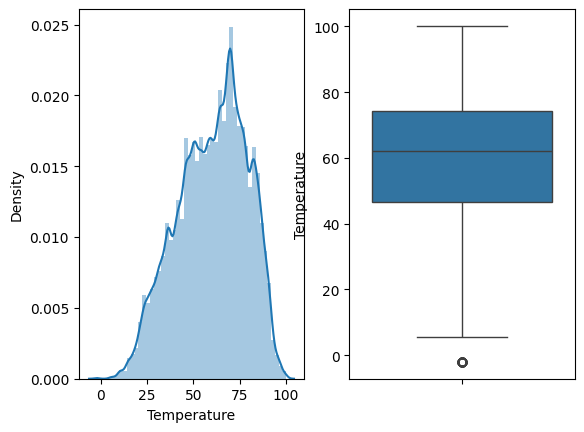

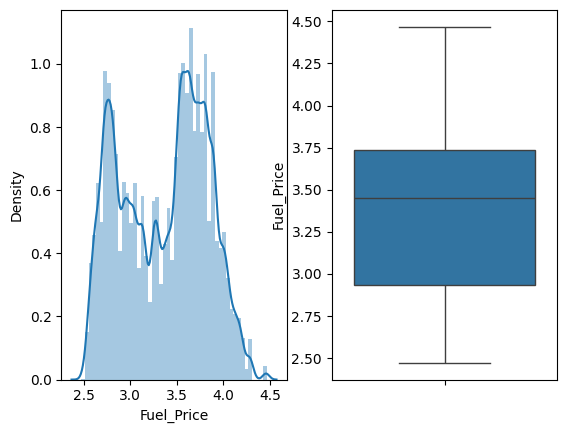

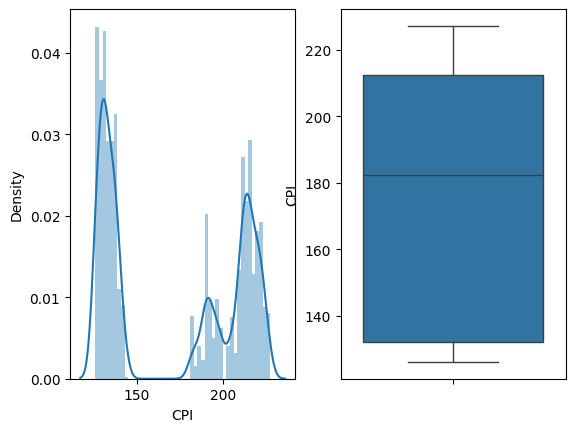

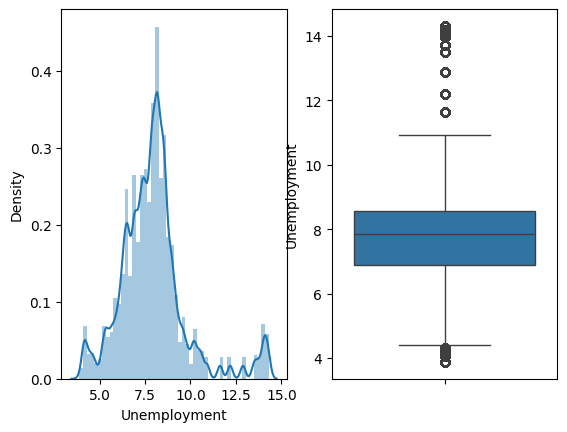

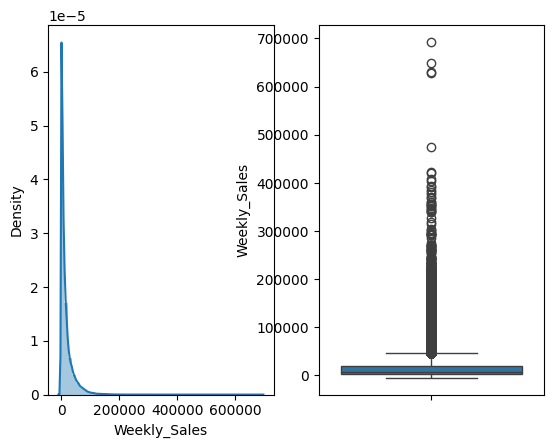

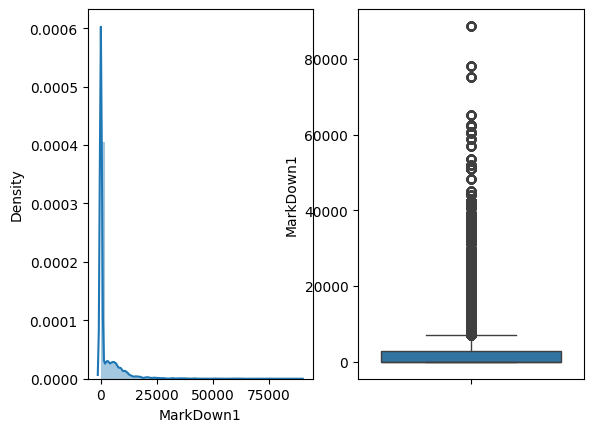

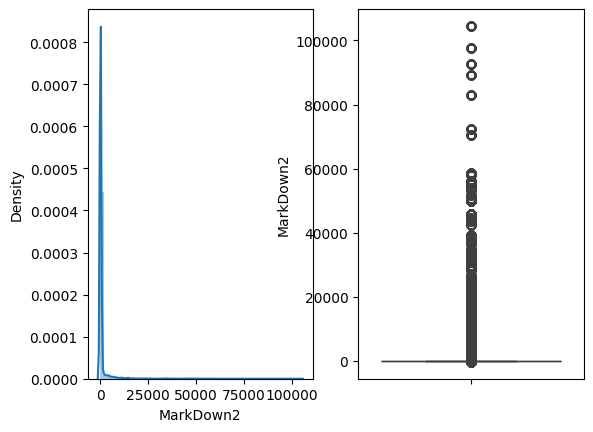

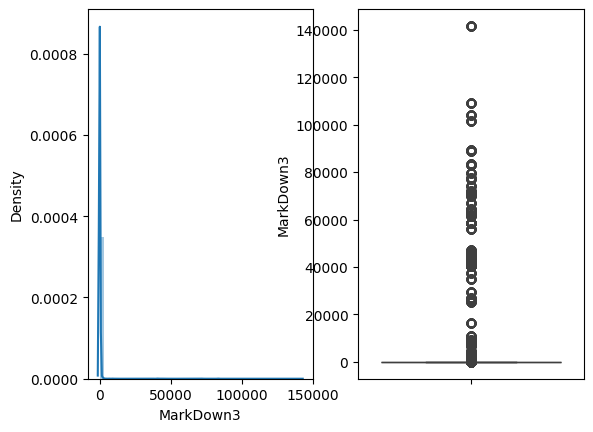

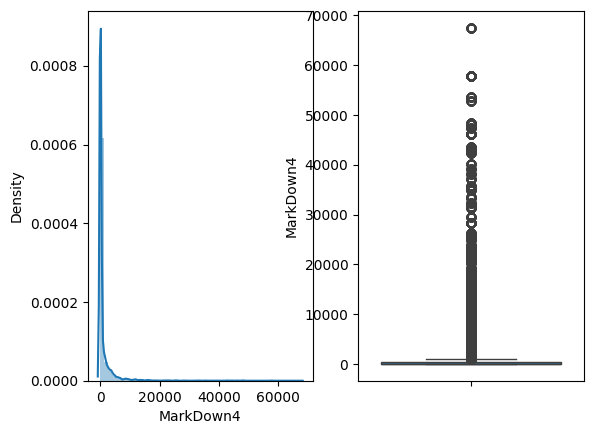

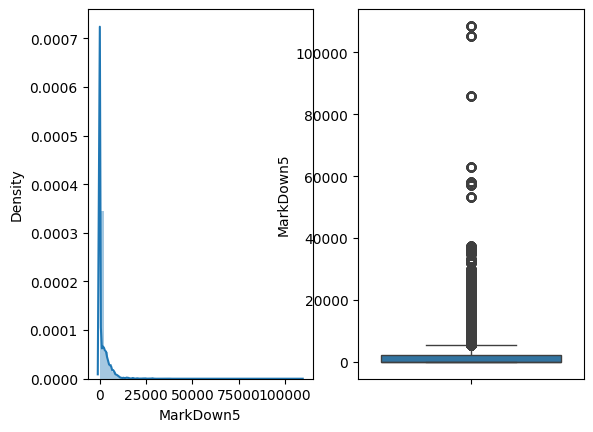

In [ ]:
for features in continuous_col:
  plot(di,features)

In [ ]:
def iqr(df,col):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  upper_limit=q3+1.5*iqr
  lower_limit=q1-1.5*iqr
  Is=df.index[(df[col] > upper_limit) | (df[col] < lower_limit)]
  return Is


In [ ]:
for i in continuous_col:
  iqr(df,i)
  print(i,"upper_limit:",upper_limit,"& lower_limit:",lower_limit)


Temperature upper_limit: 5420.1 & lower_limit: -3252.06
Fuel_Price upper_limit: 5420.1 & lower_limit: -3252.06
CPI upper_limit: 5420.1 & lower_limit: -3252.06
Unemployment upper_limit: 5420.1 & lower_limit: -3252.06
Weekly_Sales upper_limit: 5420.1 & lower_limit: -3252.06
MarkDown1 upper_limit: 5420.1 & lower_limit: -3252.06
MarkDown2 upper_limit: 5420.1 & lower_limit: -3252.06
MarkDown3 upper_limit: 5420.1 & lower_limit: -3252.06
MarkDown4 upper_limit: 5420.1 & lower_limit: -3252.06
MarkDown5 upper_limit: 5420.1 & lower_limit: -3252.06


In [ ]:
for i in continuous_col:
  upper_limit,lower_limit=iqr(df,i)
  print(i,"upper_limit:",upper_limit,"& lower_limit:",lower_limit)

Temperature upper_limit: 115.68 & lower_limit: 5.279999999999994
Fuel_Price upper_limit: 4.9455 & lower_limit: 1.7254999999999996
CPI upper_limit: 333.00848195000003 & lower_limit: 11.431177550000001
Unemployment upper_limit: 11.093499999999999 & lower_limit: 4.369500000000001
Weekly_Sales upper_limit: 47395.15625 & lower_limit: -25109.653749999998
MarkDown1 upper_limit: 7022.625000000001 & lower_limit: -4213.575000000001
MarkDown2 upper_limit: 5.5 & lower_limit: -3.3000000000000003
MarkDown3 upper_limit: 11.350000000000001 & lower_limit: -6.8100000000000005
MarkDown4 upper_limit: 1063.2250000000001 & lower_limit: -637.9350000000001
MarkDown5 upper_limit: 5420.1 & lower_limit: -3252.06


In [ ]:
# trimming
df.loc[df['Fuel_Price'] > upper_limit, 'Fuel_Price'] = upper_limit
df.loc[df['Fuel_Price'] < lower_limit, 'Fuel_Price'] = lower_limit


In [ ]:
for i in continuous_col:
  df.loc[df[i] > upper_limit, i] = upper_limit
  df.loc[df[i] < lower_limit, i] = lower_limit
  print(i,"upper_limit:",upper_limit,"& lower_limit:",lower_limit)

Temperature upper_limit: 5420.1 & lower_limit: -3252.06
Fuel_Price upper_limit: 5420.1 & lower_limit: -3252.06
CPI upper_limit: 5420.1 & lower_limit: -3252.06
Unemployment upper_limit: 5420.1 & lower_limit: -3252.06
Weekly_Sales upper_limit: 5420.1 & lower_limit: -3252.06
MarkDown1 upper_limit: 5420.1 & lower_limit: -3252.06
MarkDown2 upper_limit: 5420.1 & lower_limit: -3252.06
MarkDown3 upper_limit: 5420.1 & lower_limit: -3252.06
MarkDown4 upper_limit: 5420.1 & lower_limit: -3252.06
MarkDown5 upper_limit: 5420.1 & lower_limit: -3252.06


In [ ]:
q1=di['Weekly_Sales'].quantile(0.25)
q3=di['Weekly_Sales'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [ ]:
di.loc[di['Weekly_Sales'] > upper_limit, 'Weekly_Sales'] = upper_limit
di.loc[di['Weekly_Sales'] < lower_limit, 'Weekly_Sales'] = lower_limit

In [ ]:
def plot(df,col):
  fig,ax=plt.subplots(1,2)
  sns.distplot(df[col],ax=ax[0])
  sns.boxplot(df[col],ax=ax[1])
  plt.show()

In [ ]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')


In [ ]:
import statsmodels.api as sm

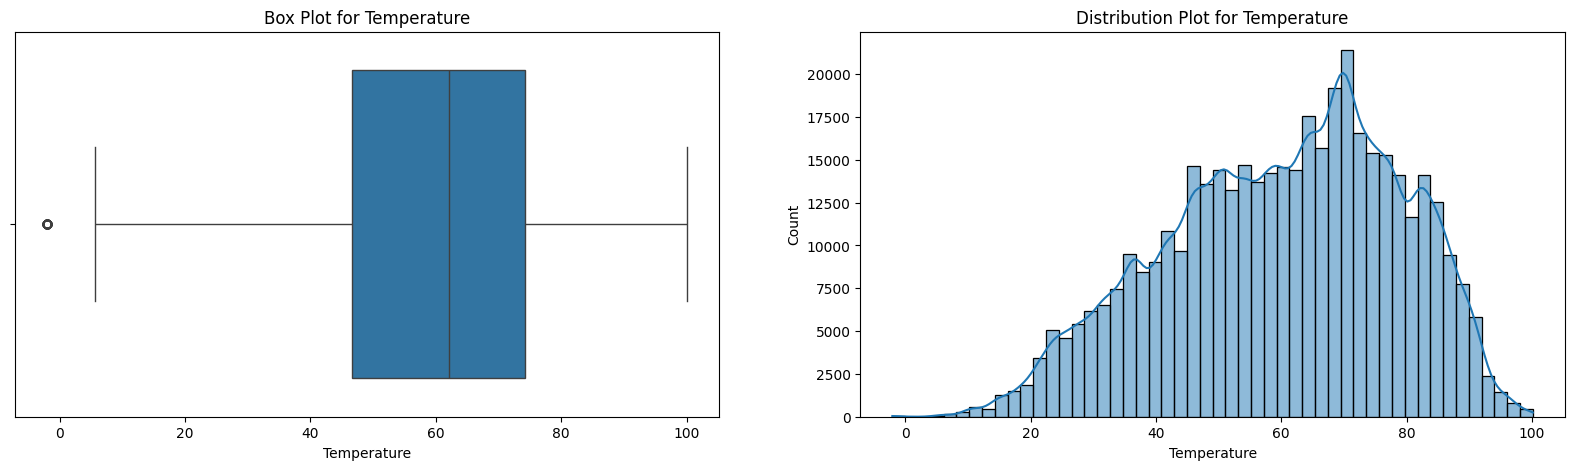

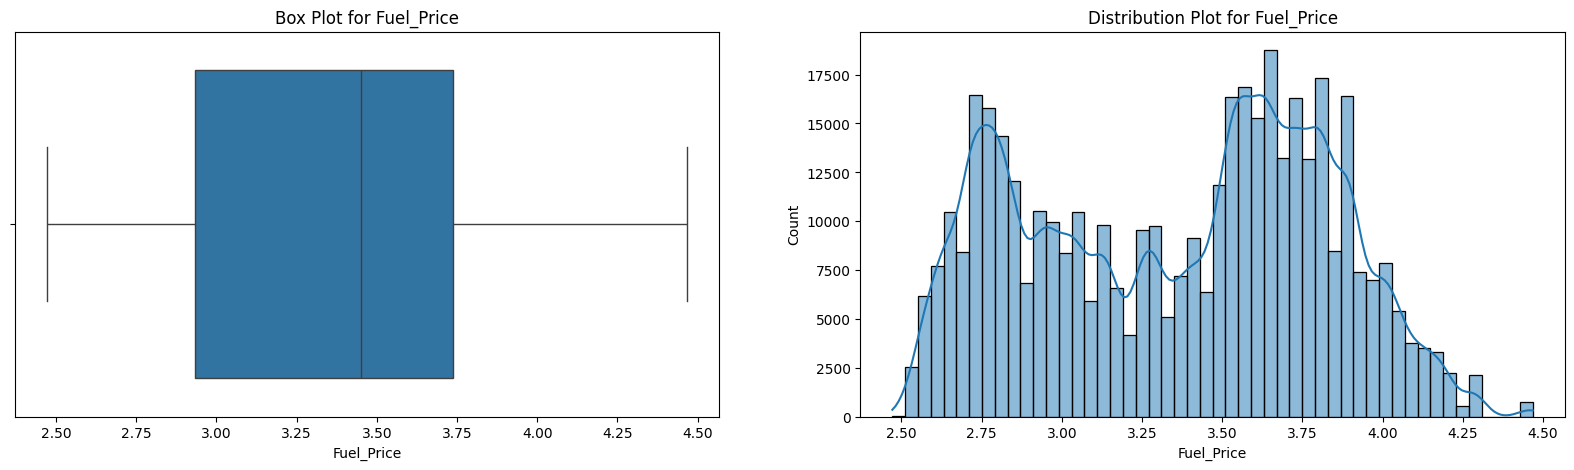

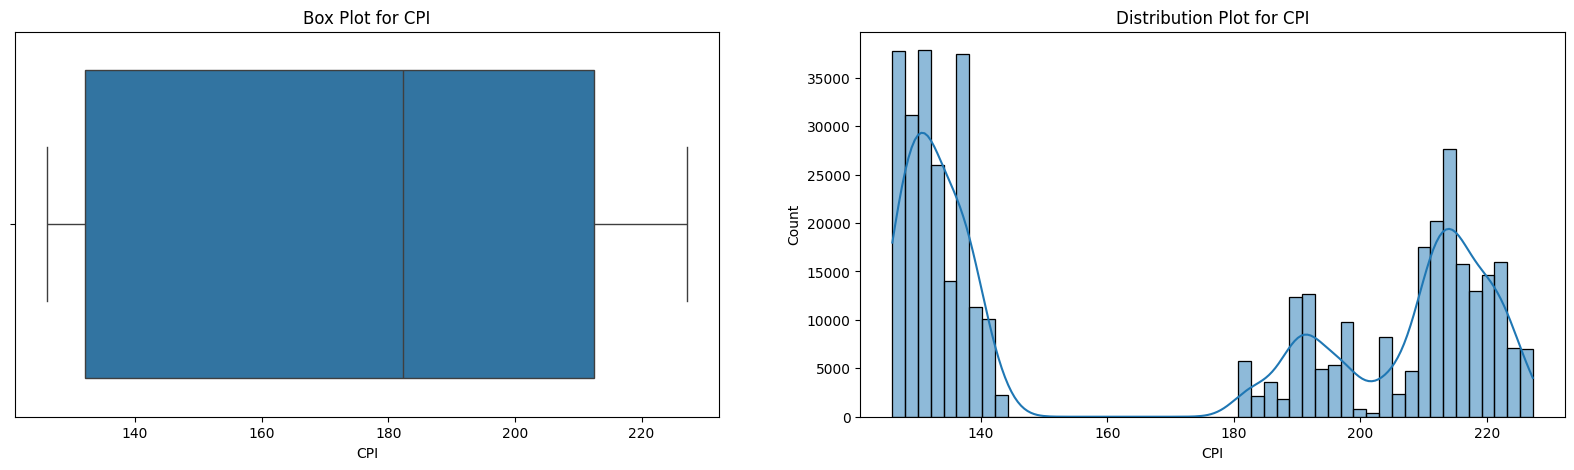

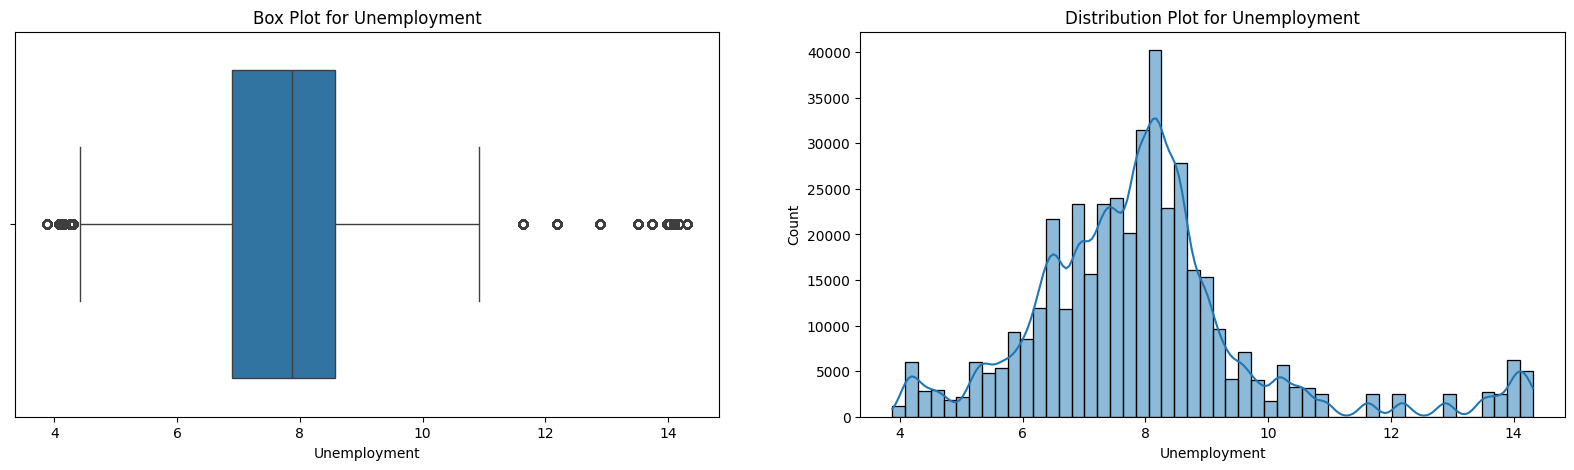

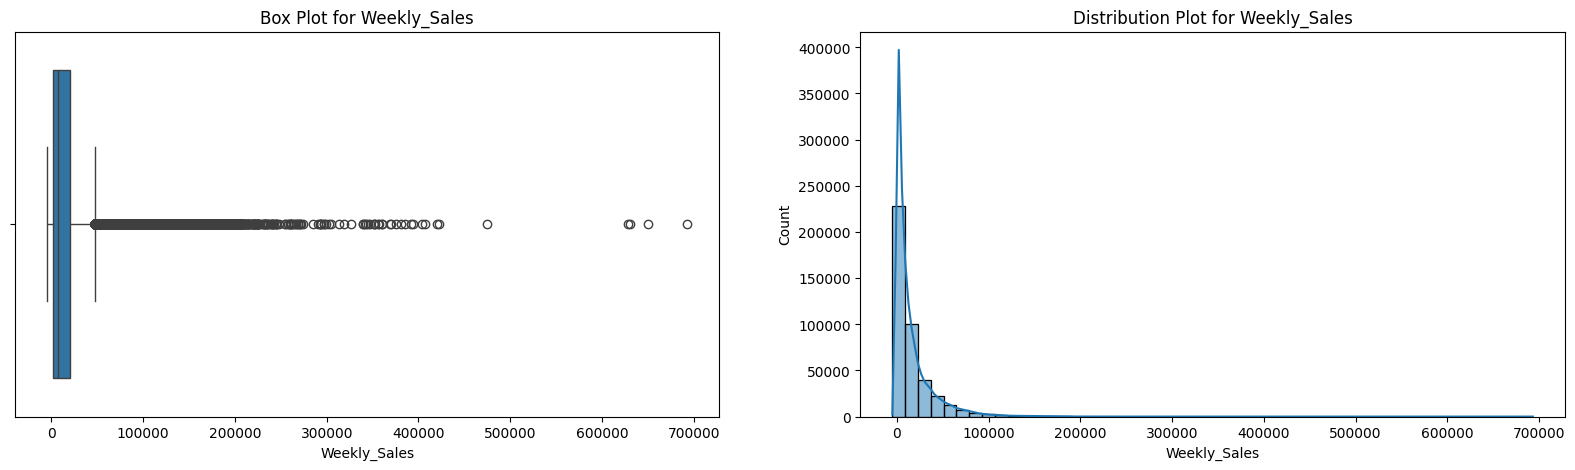

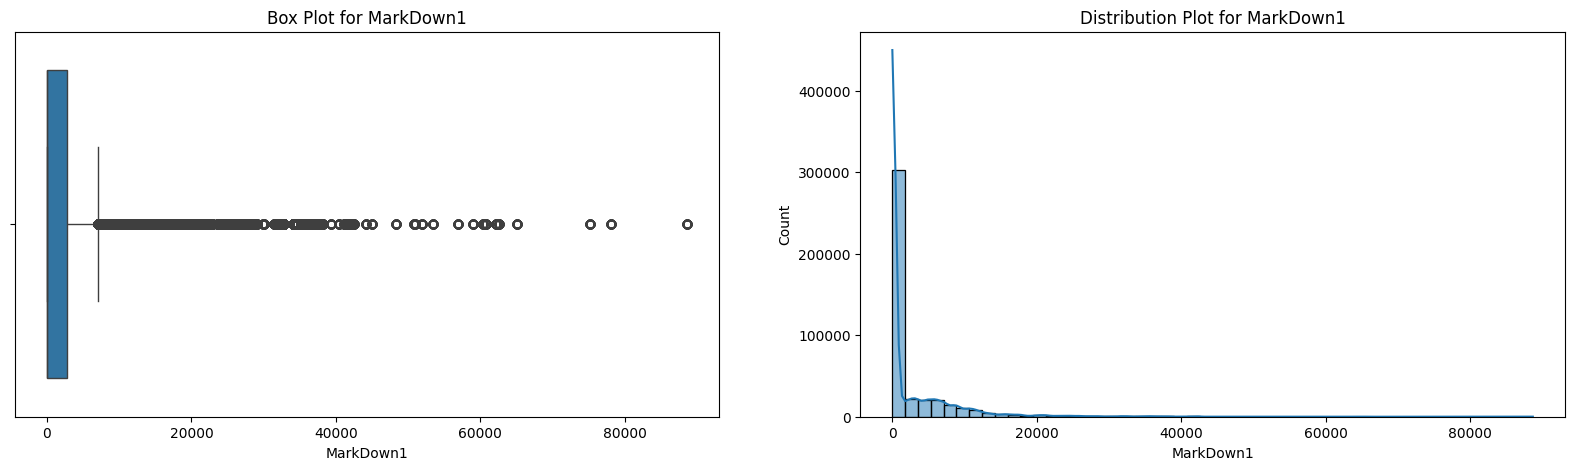

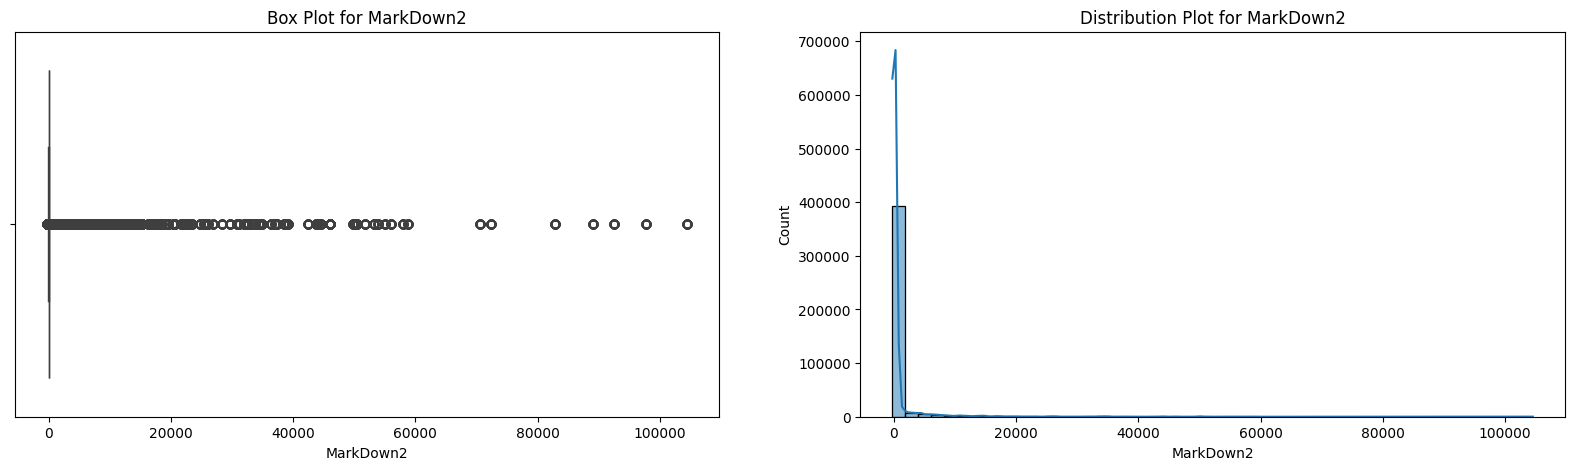

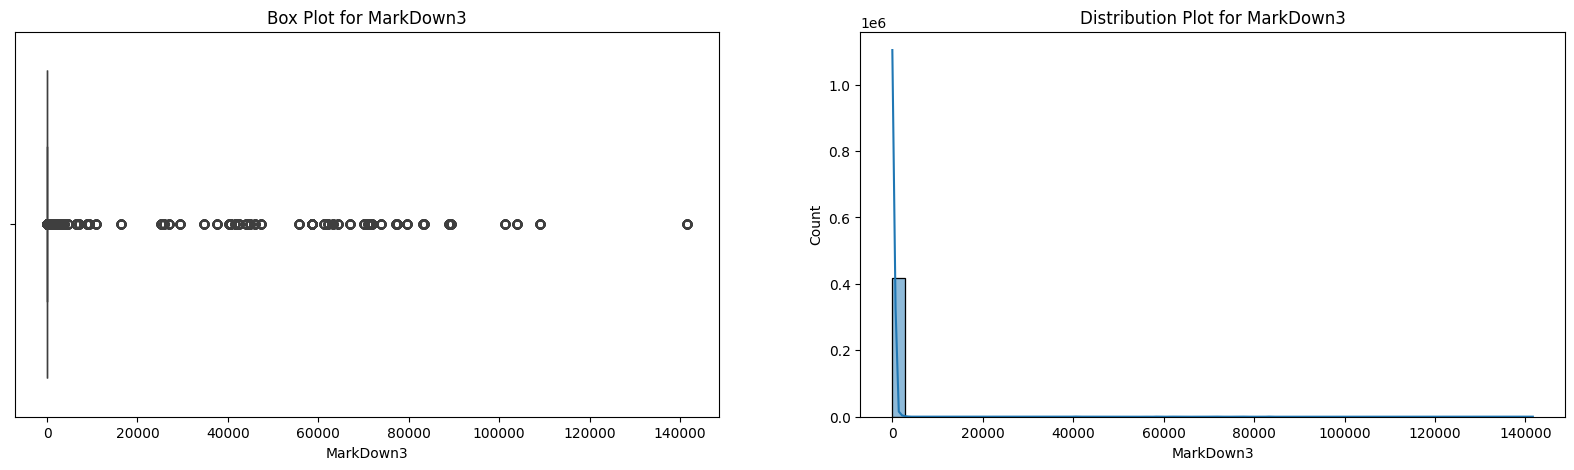

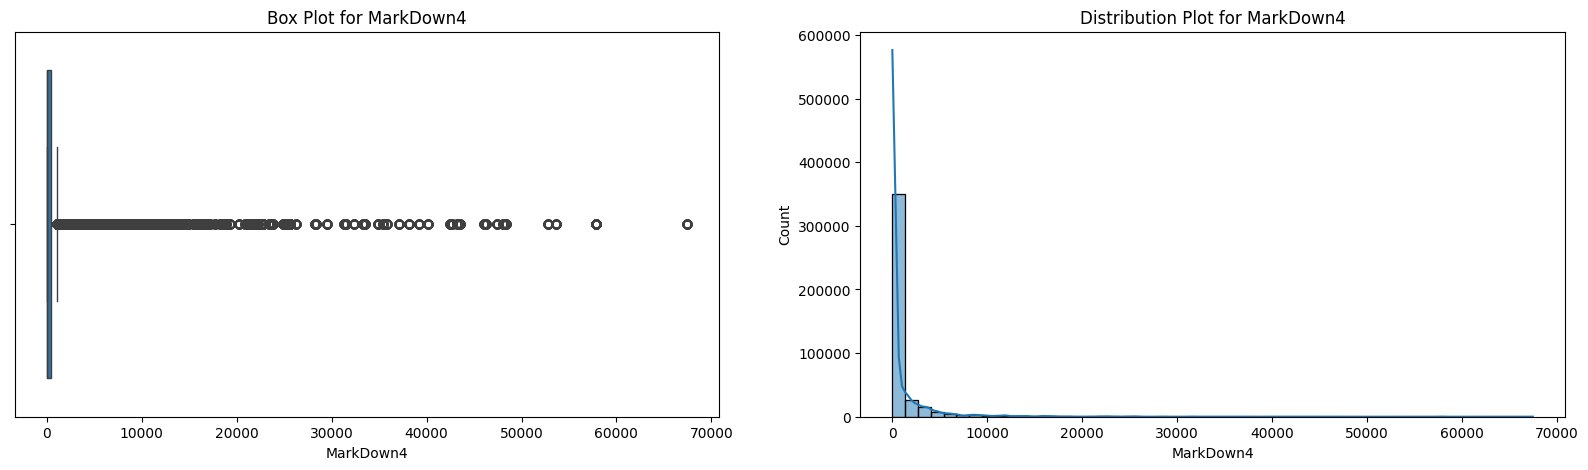

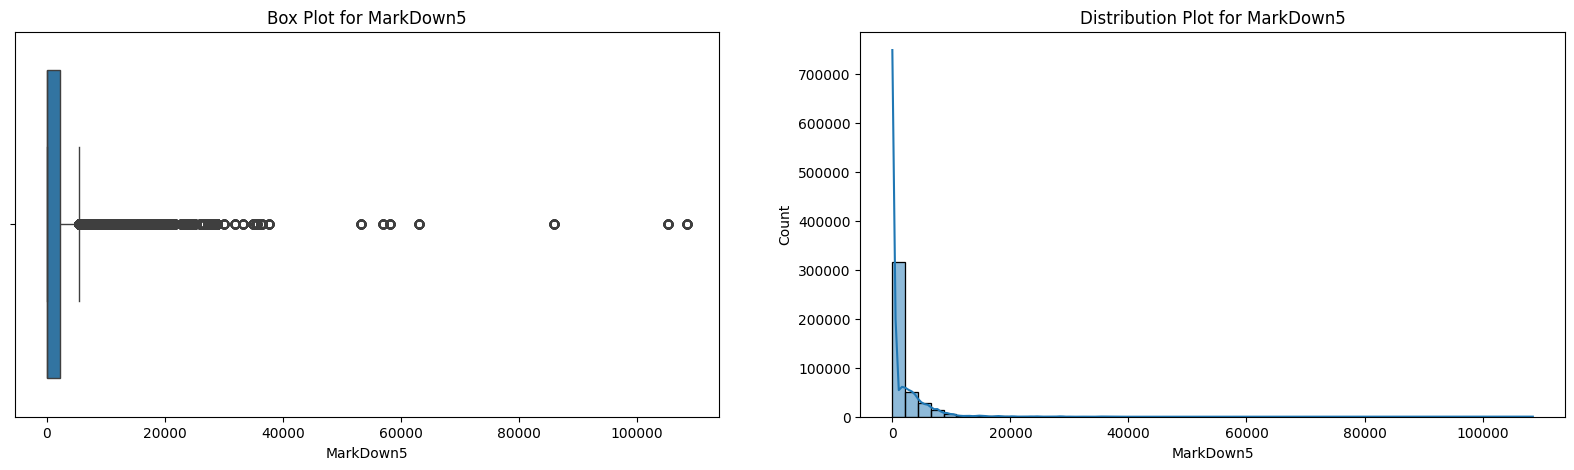

In [ ]:
for i in continuous_col:
  plot(di,i)


<ipython-input-53-5dd1b75d4e3e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax[0])


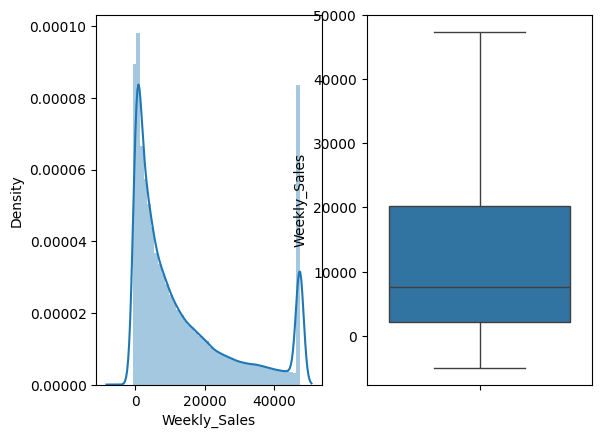

In [ ]:
plot(di,'Weekly_Sales')

In [ ]:
di.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday_y               bool
Week                    object
dtype: object

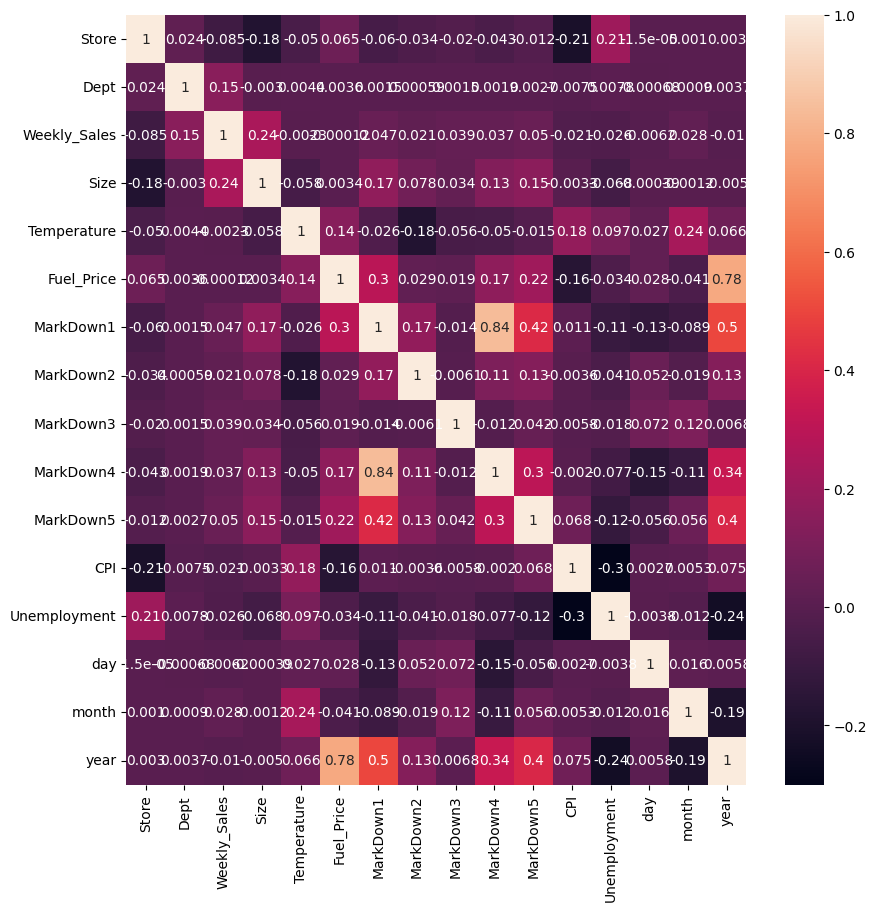

In [ ]:
di.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10,10))
sns.heatmap(di.select_dtypes(include=np.number).corr(),annot=True)
plt.show()


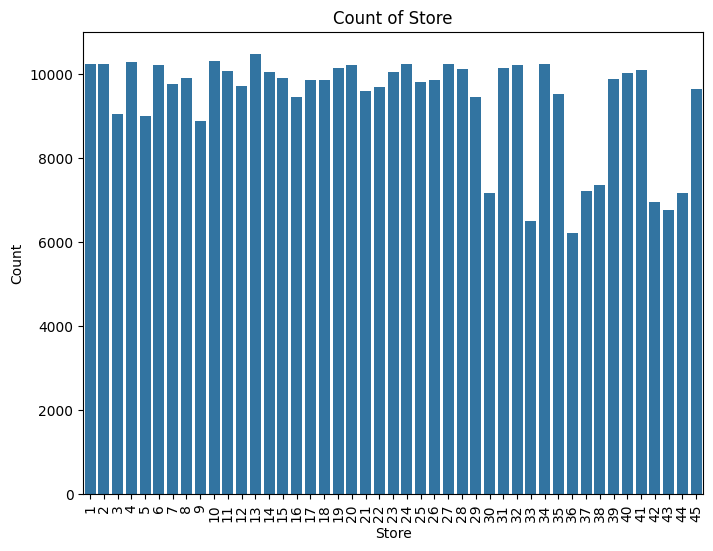

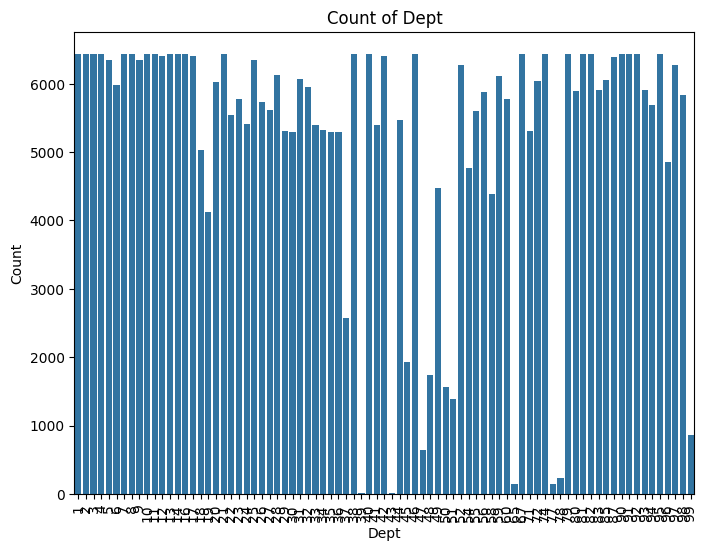

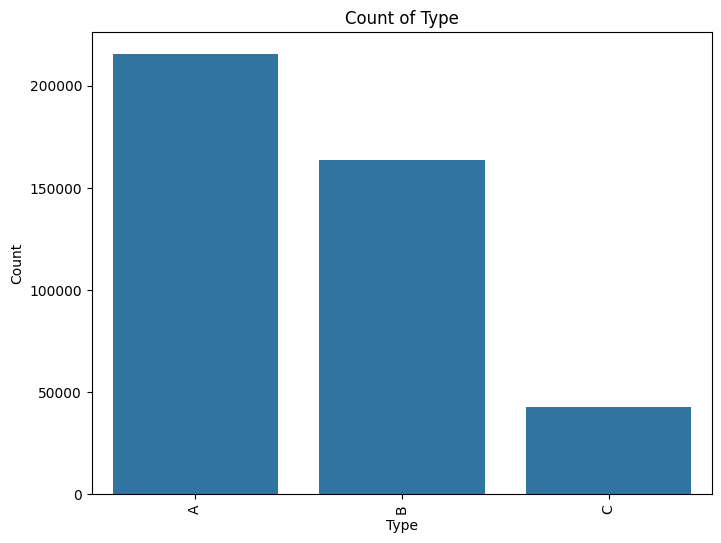

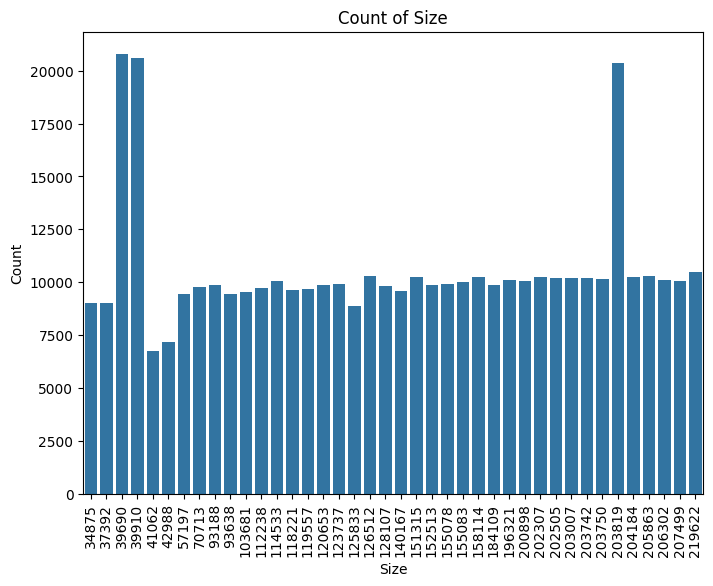

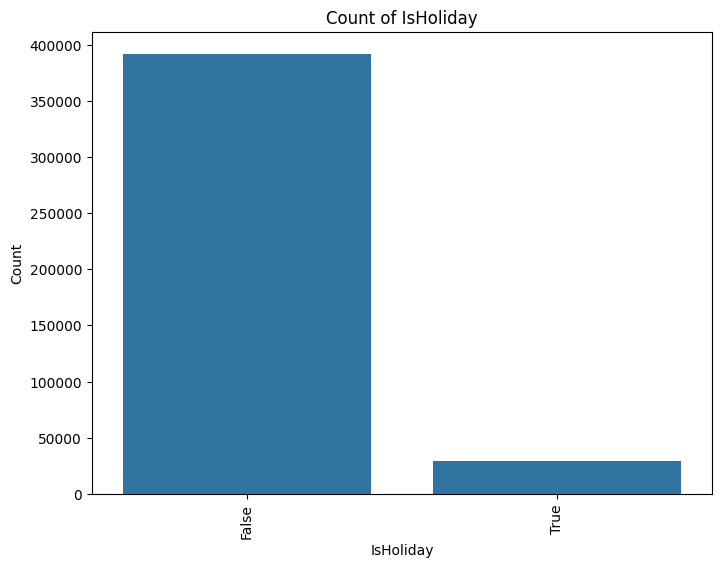

In [ ]:
for feature in cat_col:

  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, data=di)
  plt.title(f'Count of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()


In [ ]:
di.query(f"Type == 'A'")
for i in di['Type'].unique():
  if i== 'A':
    print("A_value:","\n",di.groupby((di["IsHoliday_y"]==True))['Weekly_Sales'].mean().astype(int))

A_value: 
 IsHoliday_y
False    15901
True     17035
Name: Weekly_Sales, dtype: int64


In [ ]:
di.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
Type                 3
Size                40
Temperature       3528
Fuel_Price         892
MarkDown1         2278
MarkDown2         1499
MarkDown3         1662
MarkDown4         1945
MarkDown5         2294
CPI               2145
Unemployment       349
IsHoliday_y          2
Week                52
dtype: int64

In [ ]:
di.head().T

0                    1                    2  \
Store                           1                    1                    1   
Dept                            1                    2                    3   
Date          2010-02-05 00:00:00  2010-02-05 00:00:00  2010-02-05 00:00:00   
Weekly_Sales              24924.5          47395.15625             13740.12   
Type                            A                    A                    A   
Size                       151315               151315               151315   
Temperature                 42.31                42.31                42.31   
Fuel_Price                  2.572                2.572                2.572   
MarkDown1                     0.0                  0.0                  0.0   
MarkDown2                     0.0                  0.0                  0.0   
MarkDown3                     0.0                  0.0                  0.0   
MarkDown4                     0.0                  0.0                  0.0   
MarkDown5                     0.0                  0.0                  0.0   
CPI                    211.096358           211.096358           211.096358   
Unemployment                8.106                8.106                8.106   
IsHoliday_y                 False                False                False   

                                3                    4  
Store                           1                    1  
Dept                            4                    5  
Date          2010-02-05 00:00:00  2010-02-05 00:00:00  
Weekly_Sales             39954.04             32229.38  
Type                            A                    A  
Size                       151315               151315  
Temperature                 42.31                42.31  
Fuel_Price                  2.572                2.572  
MarkDown1                     0.0                  0.0  
MarkDown2                     0.0                  0.0  
MarkDown3                     0.0                  0.0  
MarkDown4                     0.0                  0.0  
MarkDown5                     0.0                  0.0  
CPI                    211.096358           211.096358  
Unemployment                8.106                8.106  
IsHoliday_y                 False                False

**MODEL BUILDING**


In [ ]:
df=di.copy()

In [ ]:
# Import the necessary module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x=df.drop('Weekly_Sales',axis=1)
y=df['Weekly_Sales']

In [ ]:
print(x.shape)
print(y.shape)

(421570, 18)
(421570,)


In [ ]:
df.head()

Store  Dept  Weekly_Sales  Type  Size  Temperature  Fuel_Price  MarkDown1  \
0      0     0        274802     0    21          800          15          0   
1      0     1        328095     0    21          800          15          0   
2      0     2        214830     0    21          800          15          0   
3      0     3        312667     0    21          800          15          0   
4      0     4        295973     0    21          800          15          0   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5   CPI  Unemployment  \
0         18          4          0          0  1003           216   
1         18          4          0          0  1003           216   
2         18          4          0          0  1003           216   
3         18          4          0          0  1003           216   
4         18          4          0          0  1003           216   

   IsHoliday_y  day  month  year  Week  
0            0    4      1     0     4  
1            0    4      1     0     4  
2            0    4      1     0     4  
3            0    4      1     0     4  
4            0    4      1     0     4

In [ ]:
df.dtypes

Store           int64
Dept            int64
Weekly_Sales    int64
Type            int64
Size            int64
Temperature     int64
Fuel_Price      int64
MarkDown1       int64
MarkDown2       int64
MarkDown3       int64
MarkDown4       int64
MarkDown5       int64
CPI             int64
Unemployment    int64
IsHoliday       int64
day             int64
month           int64
year            int64
Week            int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
le=LabelEncoder()
for i in df.columns:
  df[i]=le.fit_transform(df[i])
  df.head()


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test
# print(mean_squared_error(y_test,y_pred))
# print(r2_score(y_test,y_pred))

10824361409.890667
0.088148368647184


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor().fit(x_train,y_train)
y_pred_train = RF_model.predict(x_train)
y_pred_test = RF_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.9970809195810588, 0.9792021101620452)

In [ ]:

from xgboost import XGBRegressor
XGB_model=XGBRegressor().fit(x_train,y_train)
y_pred_train = XGB_model.predict(x_train)
y_pred_test = XGB_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.9626953487949461, 0.9572896741193946)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GB_model=GradientBoostingRegressor().fit(x_train,y_train)
y_pred_train = GB_model.predict(x_train)
y_pred_test = GB_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.7376442349300621, 0.7386910602222889)

Computing isnull-42e72fd18603de5e2c84f39925eb34c3:   8%|▊         | 267/3457 [00:05<00:26, 119.81it/s]        /usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))


DataPrep Report
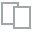
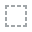
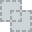
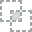
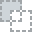
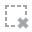
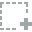
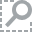
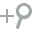
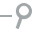
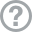
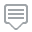
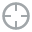
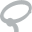
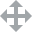
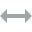
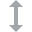
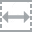
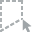
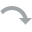
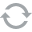
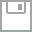
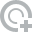
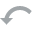
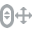
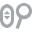
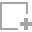
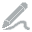
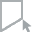
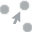
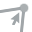
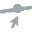

In [ ]:
create_report(di)

In [ ]:
df.skew()

Store           0.077763
Dept            0.115897
Weekly_Sales    0.153088
Type            0.693311
Size           -0.027431
Temperature    -0.061101
Fuel_Price     -0.049710
MarkDown1       1.356780
MarkDown2       2.035932
MarkDown3       1.779293
MarkDown4       1.591523
MarkDown5       1.357507
CPI             0.793081
Unemployment   -0.139531
IsHoliday       3.359867
day             0.009423
month           0.040786
year            0.056236
Week            0.052659
dtype: float64

In [ ]:
pip install dataprep

In [ ]:
from dataprep.eda import create_report

****K MEAN CLUSTERING USING ****

In [ ]:
from sklearn.cluster import KMeans

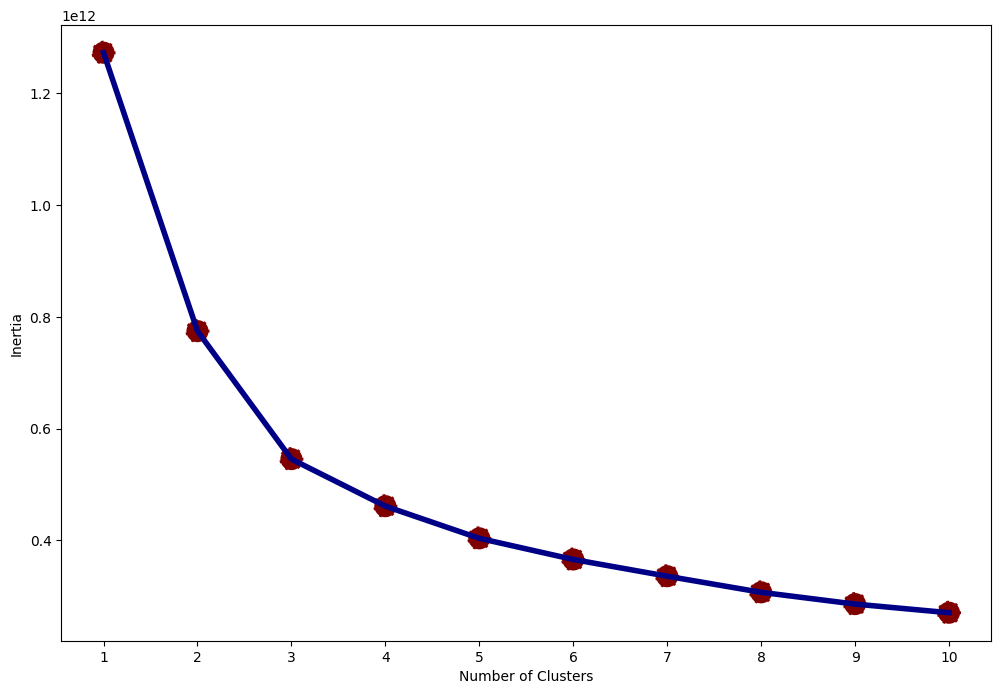

In [ ]:
inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(x)
  inertia.append(kmeans.inertia_)
plt.figure(figsize=(12, 8))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()